# Regression Model
### MAE

$\frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$

### MSE

$ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

### RMSE

$\sqrt{MSE}$

### MAPE (Mean Absolute Percentage Error)

Calculates the average percentage difference between the predicted and actual values.  $ \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100\%$

In [ ]:
act = []
pred = []
assert len(act) == len(pred)


def mean_absolute_error(actual, predicted):
    return sum(abs(a - p) for a, p in zip(actual, predicted)) / len(actual)

def mean_squared_error(actual, predicted):
    return sum((a - p) ** 2 for a, p in zip(actual, predicted)) / len(actual)

def root_mean_squared_error(actual, predicted):
    """Calculate Root Mean Squared Error (RMSE)."""
    mse = mean_squared_error(actual, predicted)
    return mse ** 0.5

def mean_absolute_percentage_error(actual, predicted):
    actual = [a if a != 0 else 1e-10 for a in actual]  # Avoid division by zero
    return sum(abs((a - p) / a) for a, p in zip(actual, predicted)) / len(actual) * 100

### R-squared
Measures the proportion of the variance in the dependent variable that can be explained by the independent variables, $1 - \frac{MSE_{model}}{MSE_{baseline}}$, where $MSE_{baseline}$ stands for a model who always predicts the mean of the target variable.


In [ ]:
def r_squared(actual, predicted):
    """Calculate R-squared."""
    if len(actual) != len(predicted):
        raise ValueError("The length of actual and predicted lists must be the same.")
    
    # Calculate mean of actual values
    mean_actual = sum(actual) / len(actual)
    
    # Calculate SSres: sum of squares of the residual errors
    ss_res = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    
    # Calculate SStot: total sum of squares
    ss_tot = sum((a - mean_actual) ** 2 for a in actual)
    
    # Calculate R-squared
    r2 = 1 - (ss_res / ss_tot)
    
    return r2

# Classification Model

### Accuracy, Precision, Recall, F1 for binary classification
- Accuracy: $\frac{TP+TN}{TP+TN+FP+FN}$
- Precision: $\frac{TP}{TP+FP}$
- Recall: $\frac{TP}{TP+FN}$
- F1: $2\times \frac{Precision \times Recall}{Precision + Recall}$

In [ ]:
def accuracy(true, pred):
    """Calculate accuracy."""
    correct = sum(t == p for t, p in zip(true, pred))
    return correct / len(true) if true else 0

def precision(true, pred):
    """Calculate precision."""
    tp = sum(t == p == 1 for t, p in zip(true, pred))
    fp = sum(t == 0 and p == 1 for t, p in zip(true, pred))
    return tp / (tp + fp) if (tp + fp) != 0 else 0

def recall(true, pred):
    """Calculate recall."""
    tp = sum(t == p == 1 for t, p in zip(true, pred))
    fn = sum(t == 1 and p == 0 for t, p in zip(true, pred))
    return tp / (tp + fn) if (tp + fn) != 0 else 0

def f1_score(true, pred):
    """Calculate F1 score."""
    prec = precision(true, pred)
    rec = recall(true, pred)
    return 2 * (prec * rec) / (prec + rec) if (prec + rec) != 0 else 0

### Accuracy, Precision, Recall, F1 for multi-label classification

In [ ]:
def calculate_tp_fp_fn(true, pred, label):
    """Calculate true positives, false positives, and false negatives for a specific label."""
    tp = sum(1 for true_labels, pred_labels in zip(true, pred) if label in true_labels and label in pred_labels)
    fp = sum(1 for true_labels, pred_labels in zip(true, pred) if label not in true_labels and label in pred_labels)
    fn = sum(1 for true_labels, pred_labels in zip(true, pred) if label in true_labels and label not in pred_labels)
    return tp, fp, fn

def macro_accuracy(true, pred, labels):
    """Calculate macro-averaged accuracy."""
    acc_sum = 0
    for label in labels:
        tp, fp, fn = calculate_tp_fp_fn(true, pred, label)
        tn = len(true) - (tp + fp + fn)
        acc_sum += (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) != 0 else 0
    return acc_sum / len(labels)

def macro_precision(true, pred, labels):
    """Calculate macro-averaged precision."""
    prec_sum = 0
    for label in labels:
        tp, fp, _ = calculate_tp_fp_fn(true, pred, label)
        prec_sum += tp / (tp + fp) if (tp + fp) != 0 else 0
    return prec_sum / len(labels)

def macro_recall(true, pred, labels):
    """Calculate macro-averaged recall."""
    recall_sum = 0
    for label in labels:
        tp, _, fn = calculate_tp_fp_fn(true, pred, label)
        recall_sum += tp / (tp + fn) if (tp + fn) != 0 else 0
    return recall_sum / len(labels)

def macro_f1(true, pred, labels):
    """Calculate macro-averaged F1 score."""
    f1_sum = 0
    for label in labels:
        tp, fp, fn = calculate_tp_fp_fn(true, pred, label)
        precision = tp / (tp + fp) if (tp + fp) != 0 else 0
        recall = tp / (tp + fn) if (tp + fn) != 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        f1_sum += f1
    return f1_sum / len(labels)

### ROC, AUC

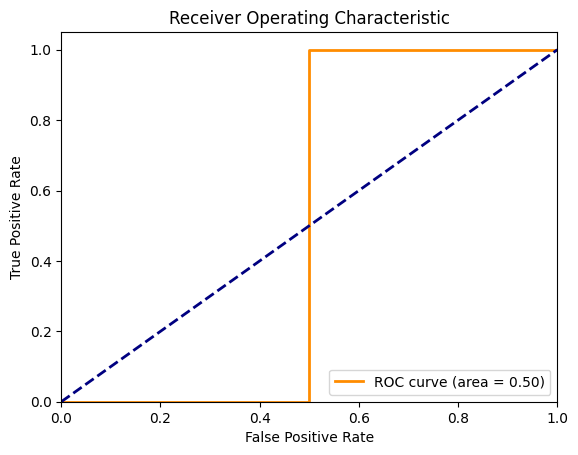

In [1]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# True binary labels and scores from a classifier
y_true = [0, 1, 1, 0, 1]
y_scores = [0.1, 0.4, 0.35, 0.8, 0.65]

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### P-R curve

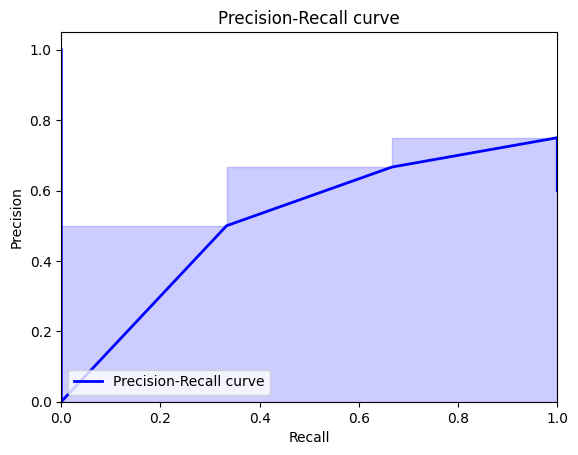

In [2]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# True binary labels and scores from a classifier
y_true = [0, 1, 1, 0, 1]
y_scores = [0.1, 0.4, 0.35, 0.8, 0.65]

# Calculate precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()


# Similarity

### Cosine Similarity

$cos(A,B)=\frac{A \cdot B}{||A||_2||B||_2}$

### Euclidean Distance

$||A-B||_2=\sqrt{\Sigma_i(A_i-B_i)^2}$

### KL Divergence

Discrete: $D_{KL}(P||Q) = \Sigma_x P(x)log(\frac{P(x)}{Q(x)})$

Continuous: $D_{KL}(P||Q)=\int p(x)log(\frac{p(x)}{q(x)})dx$


In [ ]:
import numpy as np


def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)


def euclidean_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))


def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

# Ranking model

### Mean Reciprocal Rank (MRR)

Definition - The average of the reciprocal ranks of the first relevant item for a set of queries.

$MRR=\frac{1}{|Q|}\Sigma_{i=1}^{|Q|}\frac{1}{rank_i}$

where $|Q|$ is the number of queries, and $rank_i$ is the rank position of the first relevant item for the $i$-th query.

In [ ]:
def mean_reciprocal_rank(rs):
    """Calculate Mean Reciprocal Rank (MRR)"""
    rs = (np.asarray(r).nonzero()[0] for r in rs)
    return np.mean([1. / (r[0] + 1) if r.size else 0. for r in rs])

# Example usage
queries = [[0, 0, 1], [0, 1, 0], [1, 0, 0]]  # 1 indicates relevant item
print(mean_reciprocal_rank(queries))

### Normalized Discounted Cumulative Gain (nDCG)

Definition: Measures the usefulness, or gain, of an item based on its position in the result list. The gain is accumulated from the top of the list to the bottom, with the gain of each item discounted at lower ranks.

Formula:

DCG: $DCG_p=\Sigma_{i=1}^{p}\frac{2^{rel_i}-1}{\log_2(i+1)}$

nDCG: $nDCG_p=\frac{DCG_p}{IDCG_p}$

where $rel_i$ is the relevance score of an item at position $i$, $p$ is a popular rank position, and $IDCG$ is the ideal DCG (the maximum possible DCG up to position $p$, ensuring the normalization factor makes $nDCG$ always between 0 and 1.

In [ ]:
import numpy as np

def dcg_score(y_true, y_score, k=5):
    """Calculate DCG score"""
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])
    gains = 2 ** y_true - 1
    discounts = np.log2(np.arange(2, k + 2))
    return np.sum(gains / discounts)

def ndcg_score(y_true, y_score, k=5):
    """Calculate nDCG score"""
    best_dcg = dcg_score(y_true, y_true, k)
    actual_dcg = dcg_score(y_true, y_score, k)
    return actual_dcg / best_dcg

# Example usage
true_relevance = np.asarray([3, 2, 3, 0, 1, 2])
scores = np.asarray([0.1, 0.4, 0.35, 0.8, 0.5, 0.2])
print(ndcg_score(true_relevance, scores))


### Precision at k (P@k)

Definition: The proportion of recommended items in the top-k set that are relevant.

$Precision \@ k = \frac{\text{Number of relevant items in top-k}}{k}$

In [ ]:
def precision_at_k(true, pred, k=5):
    """Calculate Precision at k"""
    assert len(pred) >= k, "The length of the prediction must be at least k."
    relevant_items = set(true)
    top_k_items = set(pred[:k])
    return len(relevant_items & top_k_items) / k

# Example usage
true_items = [1, 2, 3]
predicted_items = [2, 1, 4, 5, 3]
print(precision_at_k(true_items, predicted_items, k=3))